We have already shown the number of people earning wages and the median home value, so I wanted to go with the submetric of *median household income* to dive a little deeper into the wages we already looked at. I think the metric of median income tells a lot about what the neighborhood might be like, with people that make more money being able to spend a lot more on making their homes and neighborhood nicer.

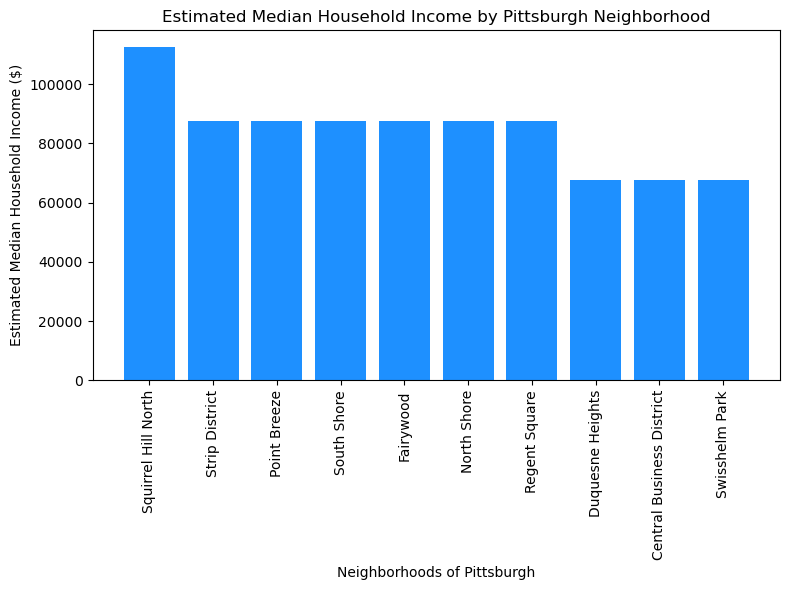

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('incomes.csv', sep=',')
#Constants for reading all the columns it needs, and median estimates for each of the income brackets
income_brackets = ['Less than $10,000','$10,000 to $14,999','$15,000 to $19,999','$20,000 to $24,999','$25,000 to $29,999','$30,000 to $34,999','$35,000 to $39,999','$40,000 to $44,999','$45,000 to $49,999','$50,000 to $59,999','$60,000 to $74,999','$75,000 to $99,999','$100,000 to $124,999','$125,000 to $149,999','$150,000 to $199,999','$200,000 or more']
bracket_medians = [5000,12500,17500,22500,27500,32500,37500,42500,47500,55000,67500,87500,112500,137500,175000,200000]

#Function to find the median estimate of a row in a dataset
def estimate_median(row):
    total = row['Total']
    remaining = total/2
    for i, bracket in enumerate(income_brackets):
        count = row[bracket]
        remaining = remaining - count
        if remaining<0:
            return bracket_medians[i]
        elif ((total==0) and (i+1<len(bracket_medians))):
            return ((bracket_medians[i]+bracket_medians[i+1])/2)

#Applying the method to incomes.csv to find the medians and sorting
df['Estimated Median Income'] = df.apply(estimate_median, axis=1)
df_sorted = df.sort_values('Estimated Median Income', ascending=False)
df_ten = df_sorted.head(10)

#Making the graph for the dataset
plt.figure(figsize=(8,6))
plt.bar(df_ten['Neighborhood'], df_ten['Estimated Median Income'], color='dodgerblue')
plt.xticks(rotation=90)
plt.xlabel('Neighborhoods of Pittsburgh')
plt.ylabel('Estimated Median Household Income ($)')
plt.title('Estimated Median Household Income by Pittsburgh Neighborhood')
plt.tight_layout()
plt.show()

Conclusion: From the data, it says Squirrel Hill North has the highest estimated median household income, making it the best neighborhood in this submetric. I can agree with this because if you look at the individual brackets, you can see that nearly a third of the people who live there have a household income of $200,000 or more. Like I stated in the beginning, the more money you make, the more you'll be able to spend on your house and in your neighborhood. Therefore, I agree Squirrel Hill North would be the best neighborhood.